In [15]:
import pandas as pd
df = pd.read_csv(r"C:\Users\patna\Downloads\sales_data.csv")
df.head()


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [29]:
df.columns
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             1000 non-null   datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

In [ ]:
#The objective of this project is to analyze sales data to identify trends, top-performing products, 
#regional performance, and factors affecting sales revenue.

In [19]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             1000 non-null   datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df['Profit'] = (df['Unit_Price'] - df['Unit_Cost']) * df['Quantity_Sold']
df[['Unit_Price', 'Unit_Cost', 'Quantity_Sold', 'Profit']].head()


,Unit_Price,Unit_Cost,Quantity_Sold,Profit
0,267.22,152.75,18,2060.46
1,4209.44,3816.39,17,6681.85
2,371.40,261.56,30,3295.20
3,4467.75,4330.03,39,5371.08
4,692.71,637.37,13,719.42


In [ ]:
#“I cleaned the dataset, handled data types, checked duplicates, and engineered a profit metric for business analysis.


In [23]:
df.describe()


,Product_ID,Sale_Date,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Profit
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1050.128000,2023-07-02 17:42:43.199999744,5019.265230,25.355000,2475.304550,2728.440120,0.15239,6487.847070
min,1001.000000,2023-01-01 00:00:00,100.120000,1.000000,60.280000,167.120000,0.00000,17.360000
25%,1024.000000,2023-03-30 00:00:00,2550.297500,13.000000,1238.380000,1509.085000,0.08000,1892.302500
50%,1051.000000,2023-06-30 12:00:00,5019.300000,25.000000,2467.235000,2696.400000,0.15000,5236.825000
75%,1075.000000,2023-10-12 00:00:00,7507.445000,38.000000,3702.865000,3957.970000,0.23000,9935.082500
max,1100.000000,2024-01-01 00:00:00,9989.040000,49.000000,4995.300000,5442.150000,0.30000,23441.110000
std,29.573505,NaN,2846.790126,14.159006,1417.872546,1419.399839,0.08720,5444.188837


In [24]:
total_sales = df['Sales_Amount'].sum()
total_profit = df['Profit'].sum()

total_sales, total_profit

(np.float64(5019265.2299999995), np.float64(6487847.07))

In [25]:
category_sales = df.groupby('Product_Category')['Sales_Amount'].sum().sort_values(ascending=False)
category_sales

Product_Category
Clothing       1313474.36
Furniture      1260517.69
Electronics    1243499.64
Food           1201773.54
Name: Sales_Amount, dtype: float64

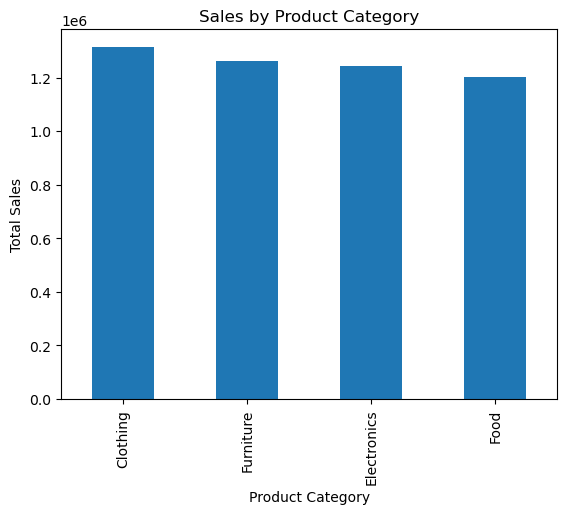

In [26]:
import matplotlib.pyplot as plt
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.show()

In [27]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit

Region
North    1661461.20
West     1656091.77
East     1650557.20
South    1519736.90
Name: Profit, dtype: float64

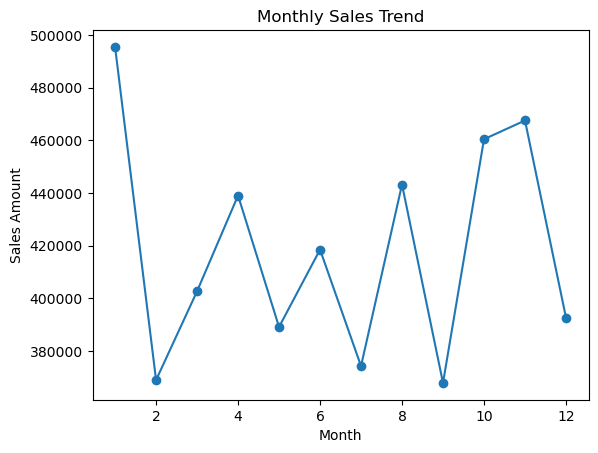

In [28]:
df['Month'] = df['Sale_Date'].dt.month

monthly_sales = df.groupby('Month')['Sales_Amount'].sum()

monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()